### Prelude

In this project, we developed a **predictive model to estimate the probability of employee attrition based on various factors**, with the final aim of helping organizations minimize turnover and its associated costs. Our **Jupyter Notebook** workflow consists of the following key steps:

 1. **Data import and exploration**: we imported necessary libraries and the dataset, then conducted an initial exploration to understand the dataset's structure, size, and summary statistics. We ensured there were no null values and examined the unique values in each column.


 2. **Data cleaning and feature engineering**: we removed unnecessary features and split the dataset into numerical and categorical sub-DataFrames. We then performed a thorough visual exploration using univariate plots and a Tableau dashboard to assess the relationships between features and the target variable.


 3. **Multicollinearity analysis**: to ensure a robust understanding of the relationships between features and their influence on the target variable, we checked for multicollinearity.


 4. **Data preparation for machine learning**: we prepared the data by encoding categorical variables, scaling numerical features, and splitting the dataset into training and testing sets.


 5. **Model evaluation and selection**: we evaluated various machine learning models and chose Logistic Regression as the most suitable for our problem.


 6. **Model improvement**: we further improved our model by applying SMOTE (an oversampling technique) and hyperparameter tuning.


 7. **Feature importance and selection**: we assessed feature importance and removed less important features, re-encoding and scaling the data accordingly.


 8. **Final model training and saving**: we retrained our Logistic Regression model with the refined dataset, applying SMOTE and hyperparameter tuning. We then saved the model and scaler to pickle files for future use, such as in our Streamlit web app.

Throughout the process, we continuously refined our dataset and model to achieve optimal results. The final product is an interesting predictive tool to later deploy in **Streamlit** that allows employers to proactively address potential employee attrition and make data-driven decisions.

In [1]:
# Importing the first libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Initial exploration and cleaning

In [2]:
# Reading the data and showing the DataFrame´s head

data = pd.read_csv('data/raw_data.csv')
data.columns = [columns_name.lower() for columns_name in data.columns]
data.columns = [columns_name.replace(' ', '_') for columns_name in data.columns]
pd.set_option("display.max_columns", None)
data.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# Understanding the DataFrame´s shape and size

data.shape

(1470, 35)

In [4]:
# Summary of the DataFrame, including the number of non-null values, the data type of each column, and the amount of memory used  

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [5]:
# It seems that according to what can be seen in the previous cell we do not have null values, but just to double check...

data.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [6]:
# Getting the number of unique values for each column in the DataFrame

data.nunique()

age                           43
attrition                      2
businesstravel                 3
dailyrate                    886
department                     3
distancefromhome              29
education                      5
educationfield                 6
employeecount                  1
employeenumber              1470
environmentsatisfaction        4
gender                         2
hourlyrate                    71
jobinvolvement                 4
joblevel                       5
jobrole                        9
jobsatisfaction                4
maritalstatus                  3
monthlyincome               1349
monthlyrate                 1427
numcompaniesworked            10
over18                         1
overtime                       2
percentsalaryhike             15
performancerating              2
relationshipsatisfaction       4
standardhours                  1
stockoptionlevel               4
totalworkingyears             40
trainingtimeslastyear          7
worklifeba

At a glance, we see that the features 'employeecount', 'over18' and 'standardhours' are single value columns that contribute nothing to our analysis. Additionally, 'employeenumber' column is unnecessary as we already have pandas index for each employee recorded in the DataFrame. Therefore, we will **remove** them immediately.

In [7]:
# Removing unnecessary features 

data = data.drop(['employeecount', 'over18' ,'standardhours', 'employeenumber'], axis=1)

In [8]:
# Splitting the DataFrame into numerical and categorical sub-DataFrames 

numerical_df = data.select_dtypes(np.number)
categorical_df = data.select_dtypes(object)

### Further exploration of numerical and categorical features
#### Numericals

In [9]:
# Descriptive statistics that summarizes the central tendency, dispersion and shape of the numerical features

data.describe()

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


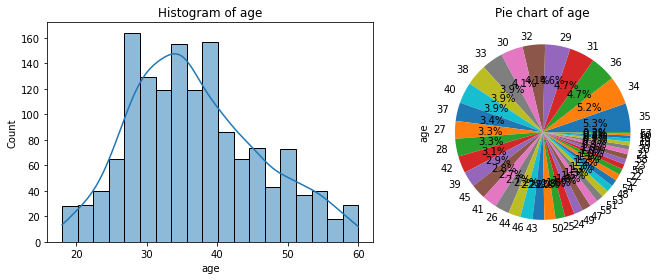

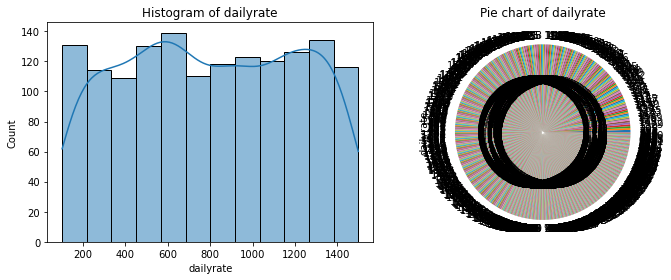

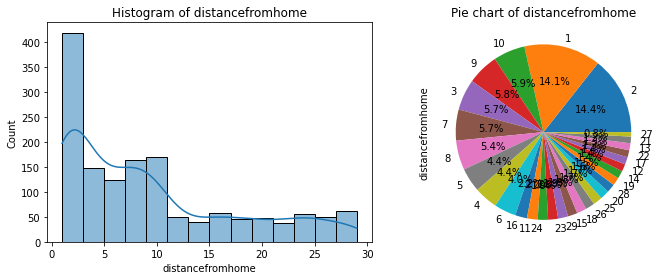

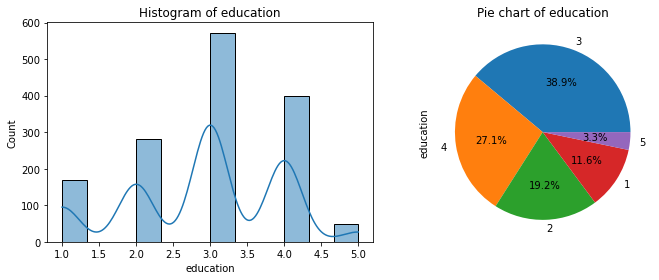

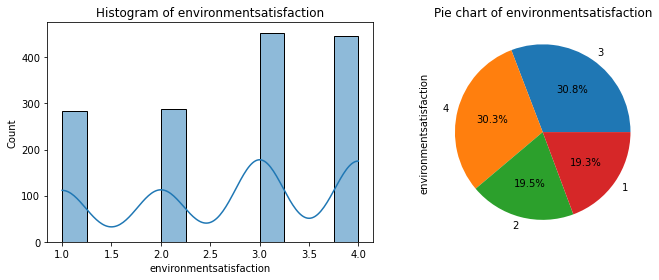

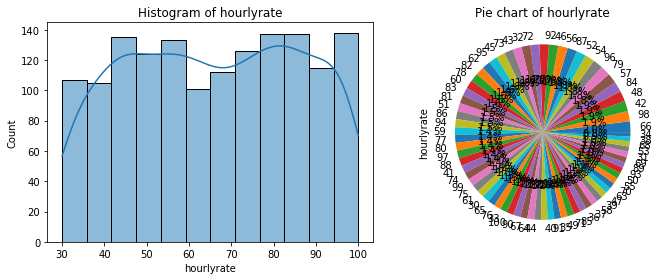

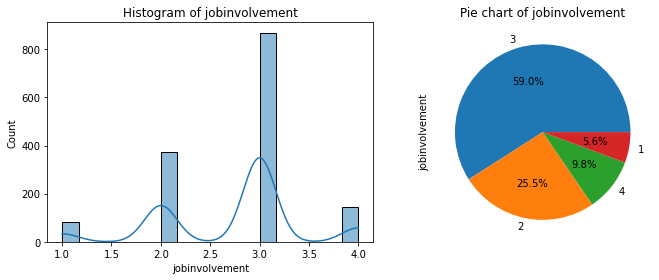

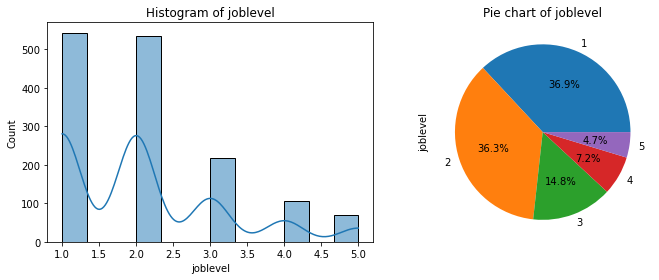

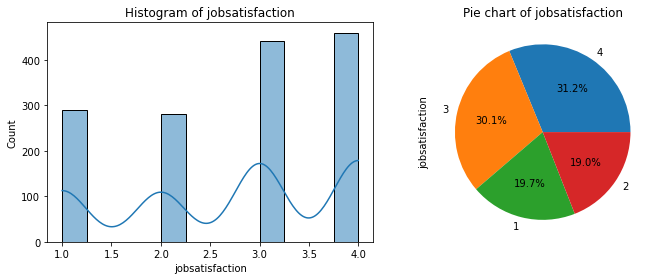

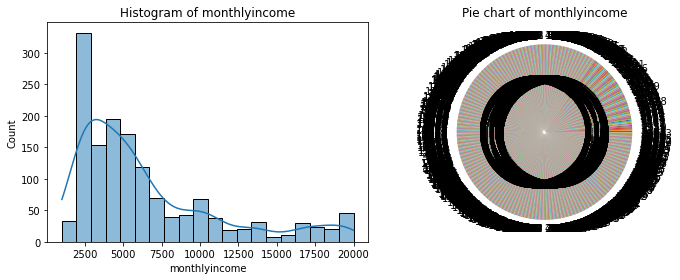

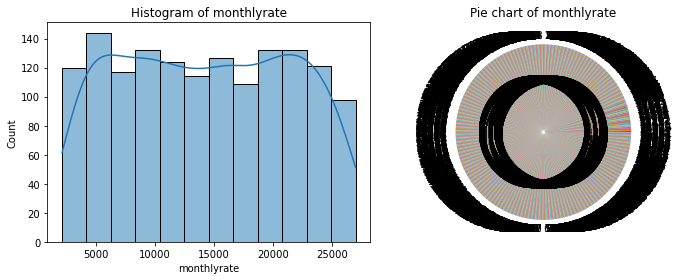

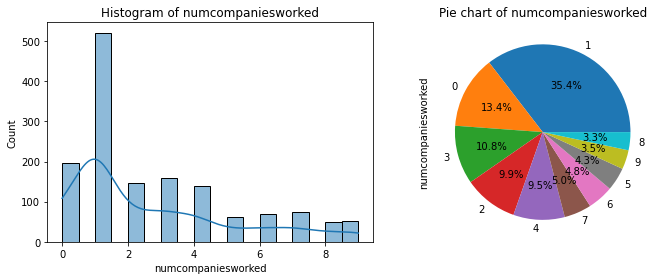

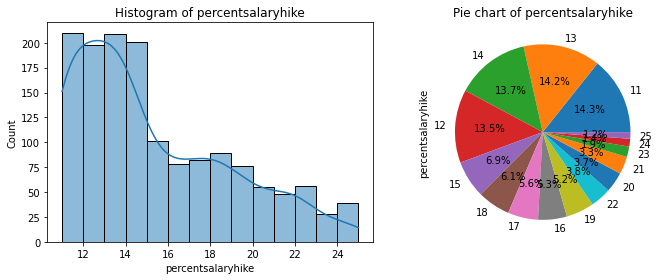

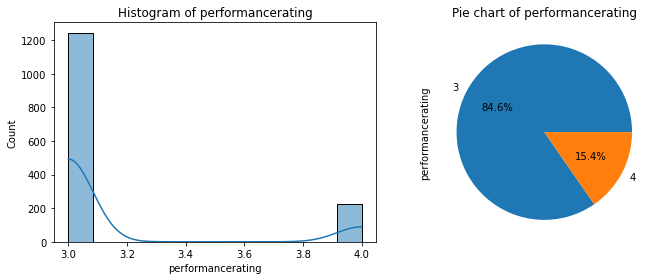

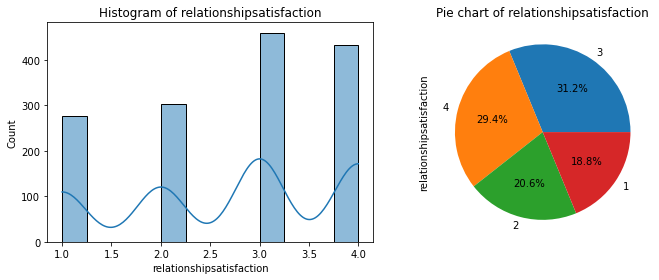

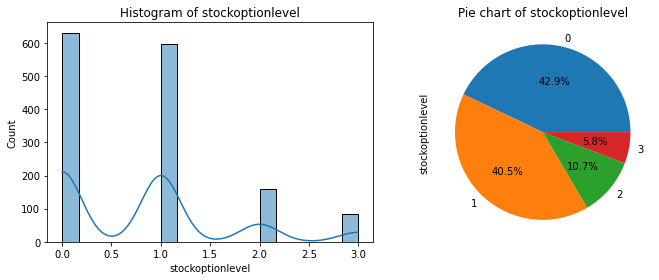

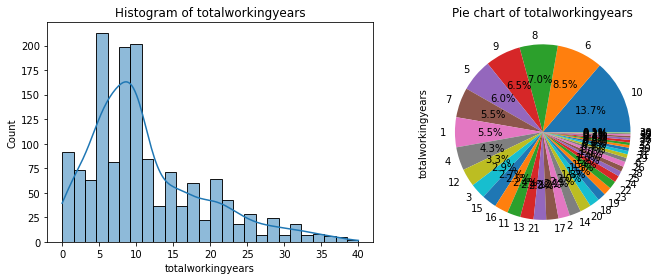

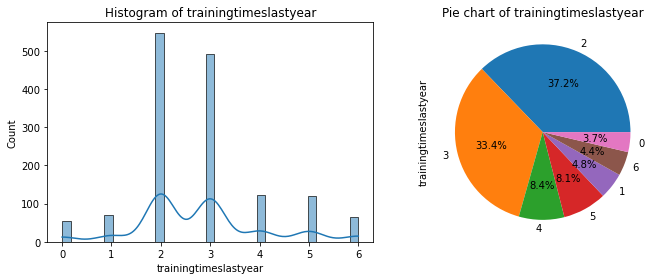

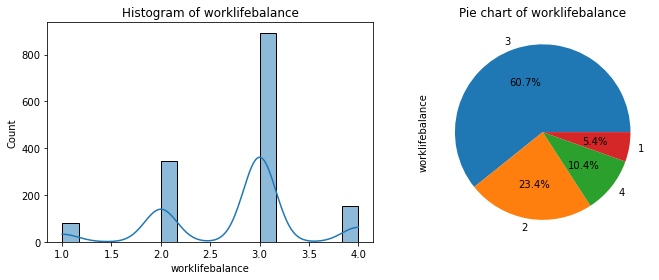

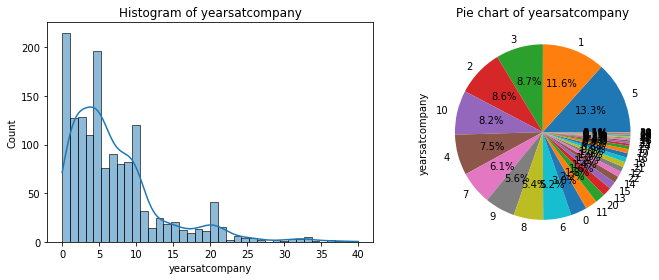

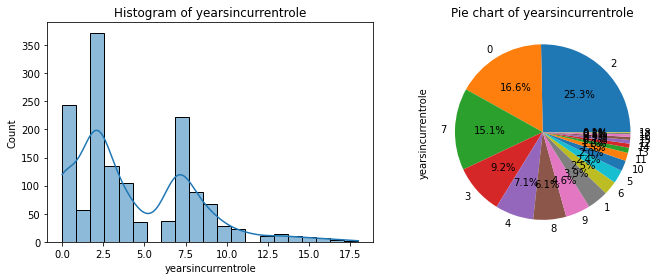

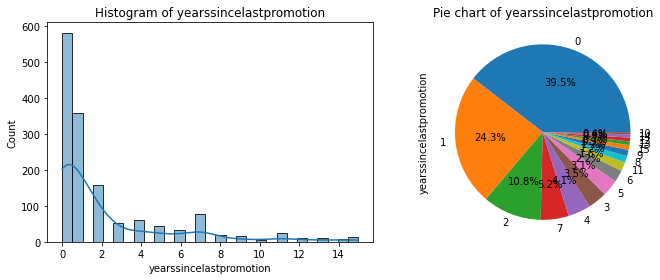

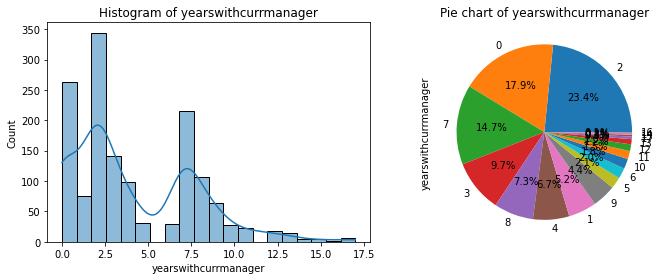

In [10]:
# Visual exploration of numerical features

for col in numerical_df:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  
    
    
    sns.histplot(data=numerical_df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    
    
    numerical_df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
    axes[1].set_title(f'Pie chart of {col}')
    
    plt.tight_layout()  
    plt.show()

##### We acknowledge that the pie charts for 'dailyrate', 'hourlyrate', 'monthlyincome', and 'monthlyrate' do not look good. The reason is that these features represent continuous numerical data, which means they can take on any value within a specified range. Pie charts are more suitable for categorical or discrete numerical data, where there is a limited number of distinct values or categories. 


 - **'age'**. Most of the employees are between 28 and 40 years of age. In general, the data is quite dispersed; the average age of employees of the company is 36.9 years.


 - **'dailyrate'**. The daily rate is quite evenly distributed.


 - **'distancefromhome'**. We can say almost all employees leave close to the organization´s offices / site. 


 - **'education'**. More than one third of the employees has bachelor level studies (3), followed by master´s degree (4), and college level (2).


 - **'environmentsatisfaction'**. More than half of the company's employees are satisfied in this regard, however, more than a third are not entirely pleased with the comany's environment policies and actions. 


 - **'hourlyrate'**. The hourly rate is quite evenly distributed, whcih explains what we have seen previously with the daily rate. 


 - **'jobinvolvement'**. Most employees are involved and committed to their work, but more than a quarter have low to medium involvement.


 - **'joblevel'**. As expected, the organization´s chart has a pyramid hierarchy, with fewer managerial positions and more lower level positions to deal with the operative work. 


 - **'jobsatisfaction'**. More than half of the company's employees are satisfied with their jobs, however, more than a third are somewhat unsatisfied or directly unsatisfied.


 - **'monthlyincome'**. There is a big difference between the highest and lowest salaries, and as expected, as wages increase, fewer people receive them. This is very much in line with what we have seen before in the feature of 'joblevel'.


 - **'monthlyrate'**. The monthly rate is quite evenly distributed, which is explained by the hourly rate and the daily rate. 


 - **'numcompaniesworked'**. Almost half of employees (45.3%) have only worked for 1 or 2 companies.
     
     
 - **'percentsalaryhike'**. Most employees have a salary increase of between 11% and 15% very few get the higher grade of 24% and 25%.


 - **'performancerating'**. It seems this company is composed entirely by high-performing people with performance ratings of excellend and outstanding. 


 - **'relationshipsatisfaction'**. More than half of the company's employees are satisfied with their employment relationships, but more than a third are somewhat unsatisfied or directly unsatisfied with it.
       
       
 - **'stockoptionlevel'**. Almost half of the employees do not have stocks as part of their compensation and benefits. The ones that do, must correspond with the ones with higher 'joblevel' (managerial roles or extremely qualified profesionals that the company wants to keep almost at all costs). 


 - **'totalworkingyears'**. Most employees have a total experience of in between 5 and 15 years.


 - **'trainingtimeslastyear'**. Most employees had 2-3 trainings the previous year. 
     
     
 - **'worklifebalance'**. More than 70% of the employees are somewhat satisifed or directly satisfied with the work-life balance they have at the company. 


 - **'yearsatcompany'**. Approximately half of the employees (49.7%) stay in the company in between 1 and 5 years. 


 - **'yearsincurrentrole'**. The 16.6% of the employees seem to be new-joiners, and then the percentages are quite balanced, with the remark that a quarter of the employees stay 2 years in their current role, a there are a surprisingly 15% of employees that stay 7 years in the same position.
     
     
 - **'yearssincelastpromotion'**. More than a third of employees are promoted before reaching 4 years of tenure. 


 - **'yearswithcurrmanager'**. Approximately half of the employees have been with the same manager for more than 4 years. 

#### Categoricals

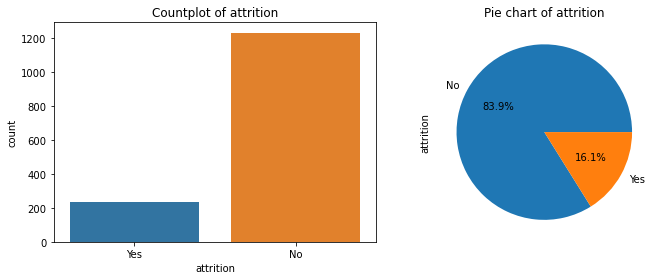

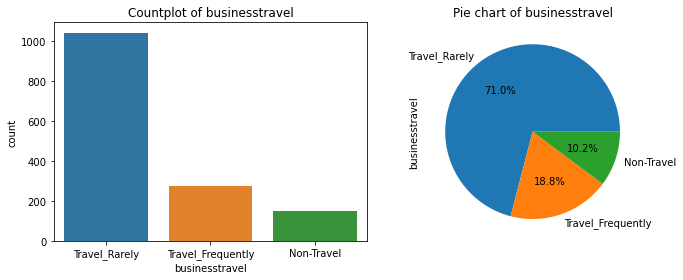

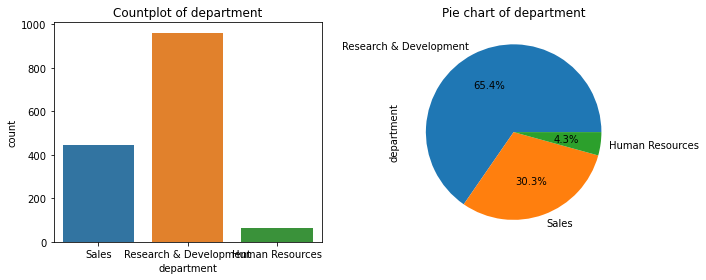

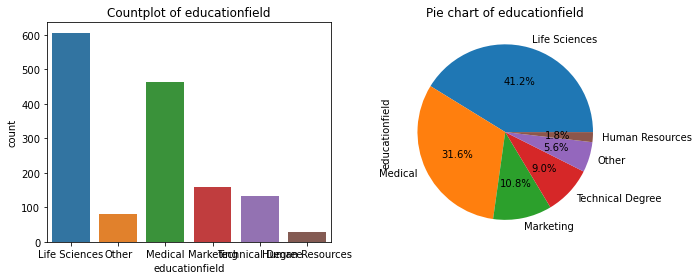

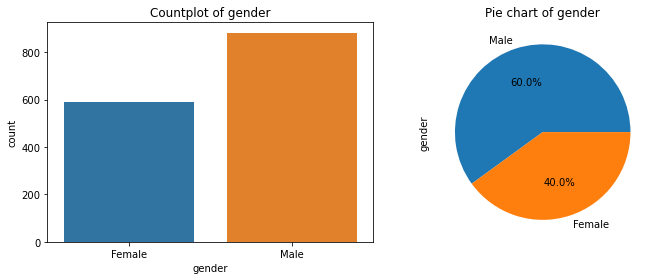

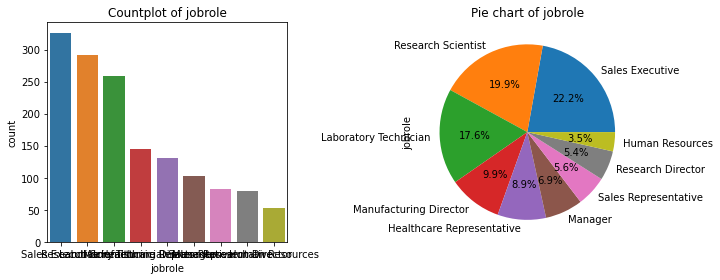

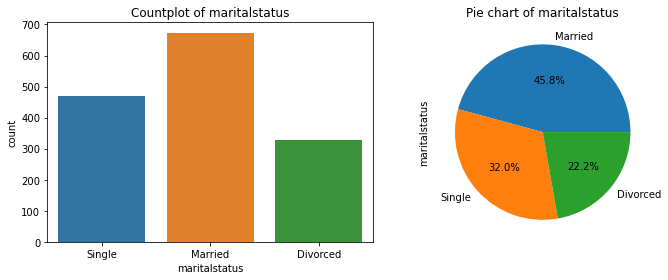

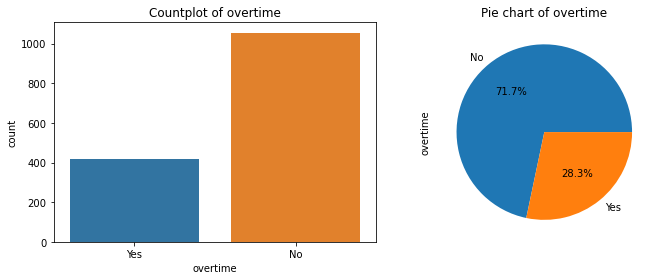

In [11]:
# Visual exploration of categorical features

for col in categorical_df:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    sns.countplot(data=categorical_df, x=col, ax=axes[0])
    axes[0].set_title(f'Countplot of {col}')
    
    categorical_df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
    axes[1].set_title(f'Pie chart of {col}')
    
    plt.tight_layout()
    plt.show()

 - **'attrition'**. The probability of the employee remaining with the company is significantly higher than the probability of leaving the company. We can see clearly and in a visual way that we have class imabalance in our target variable. 


 - **'businesstravel'**. Less than 20% of the employees travel frequently, and 10 % do not travel at all. 


 - **'department'**. Of the three departments in the company, most employees belong to R&D, followed by Sales and ultimately Human Resources.


 - **'educationfield'**. Most of the employees have Life Sciences and Medical academic backgrounds, in line with what we just saw in the previous feature.


 - **'gender'**. The division in between genders is quite equitative, but having more males (6 out of 10) than females. 
    
    
 - **'jobrole'**. There are 9 types of job roles of which the most typical are Sales Executives and Research Scientists (around 20% of the total each); the least typical being Human Resources with 3.5%.


 - **'maritalstatus'**. Nearly half of all employees are married.


 - **'overtime'**. Almost one third of the employees work overtime.

### More visual exploration (Tableau)

It does make sense to explore the univariate distribution of numerical and categorical features as we just did above. This can help us identify data quality issues or patterns that might warrant further investigation or preprocessing.

To understand the **relationship between features and the target variable**, it is always a good idea to create plots that focus on these relationships. Therefore, for more advanced and interactive visualizations that focus on the relationships between features and the target variable, 'attrition', we will redirect you to the work we have done in **Tableau**: [Tableau](https://public.tableau.com/app/profile/alejandro.lb/viz/Employee_Attrition_16814910243030/Dashboard?publish=yes) 

### Multicollinearity

Multicollinearity is not always a significant concern in a classification problem like the one we are tackling right now, particularly when using certain algorithms. In some cases, even with multicollinearity, the model can still make accurate predictions. The primary concern with multicollinearity is that it may result in unstable estimates of feature importance or misleading interpretations of feature relationships.

Considering our project and the goal we got, we could proceed without checking for multicollinearity. However, it is still a good idea to be aware of potential multicollinearity issues, and therefore, we will check it to ensure a more robust understanding of the relationships between features and their influence on the target variable.

In [12]:
# Converting the 'attrition' column values, our target variable, into binary values in a copy DataFrame

data_copy = data.copy()

data_copy['attrition'] = data_copy['attrition'].map({'Yes': 1, 'No': 0})

# Correlation Coefficient to find the pairwise correlation of the numerical features and the target variable

data_copy.corr()

,age,attrition,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
dailyrate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
distancefromhome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
environmentsatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
hourlyrate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
jobinvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
joblevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
jobsatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


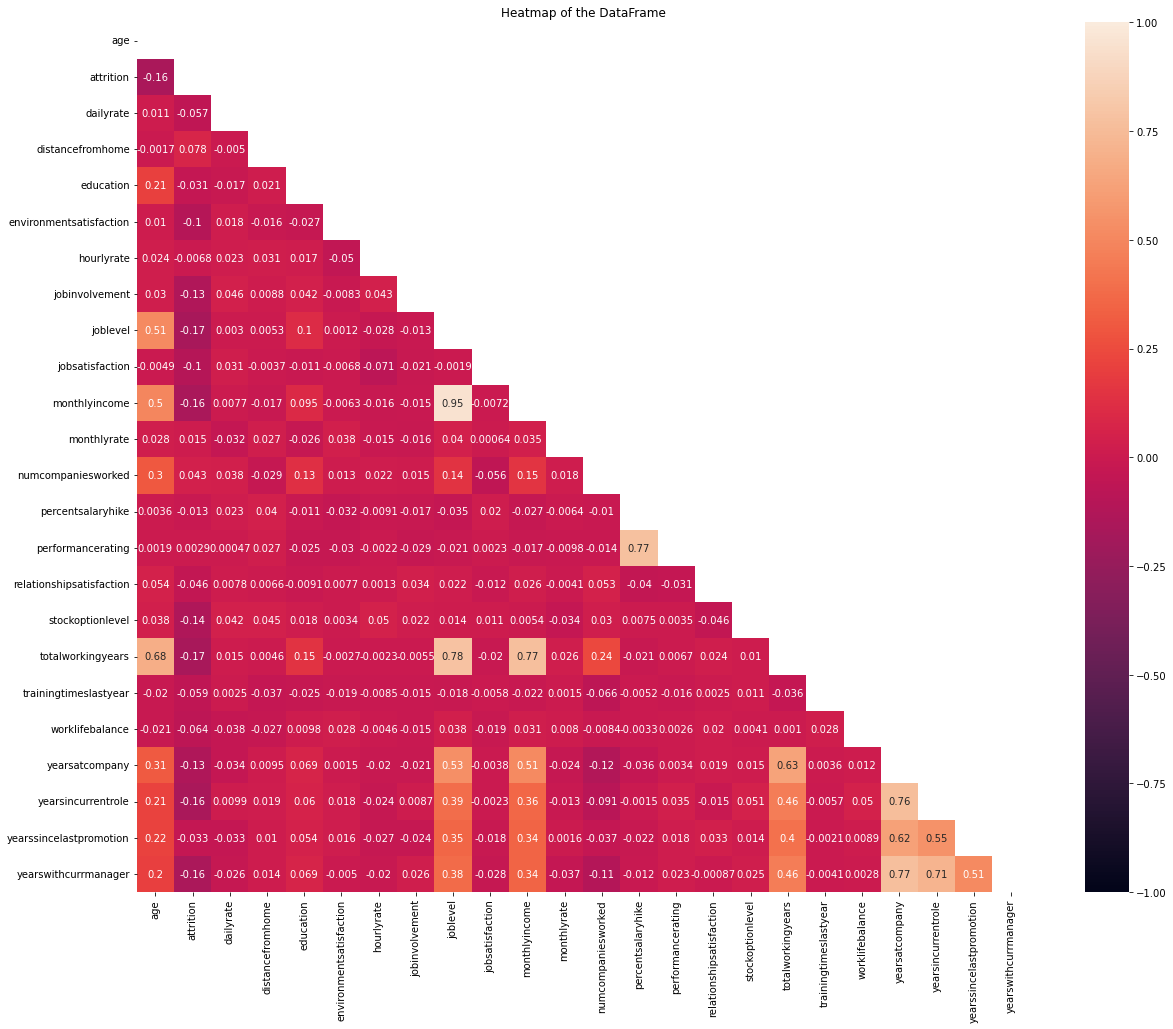

In [13]:
# Heatmap to visually find the pairwise correlation of the numerical features and the target variable

plt.figure(figsize=(20,16))
mask = np.triu(np.ones_like(data_copy.corr(), dtype=bool))
sns.heatmap(data_copy.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Heatmap of the DataFrame')
plt.show()

(Text(0.5, 1.0, 'Features Correlating with Attrition'),)

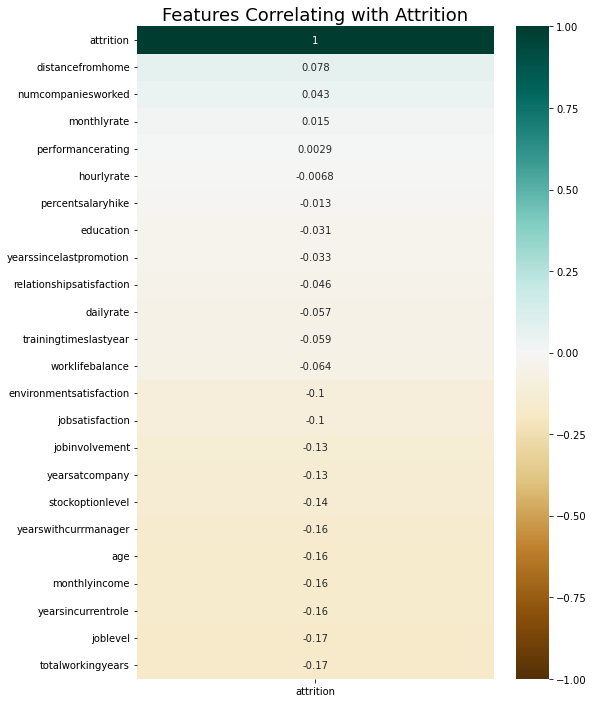

In [14]:
# Another Heatmap to check the results in a different manner

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_copy.corr()[['attrition']].sort_values(by='attrition', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Attrition', fontdict={'fontsize':18}), 

 - 'monthlyincome' and 'joblevel' are highly correlated. It makes perfect sense.


 - 'totalworkingyears' and 'joblevel' are somewhat correlated (but < 90%). It also makes sense.
 
 
 -  By far, the numerical feature more correlated with our target variable, 'attrition', is 'distancefromhome'.

### Saving / Exporting the transformed data for upcoming purposes before dummifying / encoding

In [15]:
data.to_csv("data/transformed_data.csv", index=False)

### Data preparation for ML (dummifying / encoding the categorical data)

In [16]:
# Converting the values of 'attrition', 'gender' and 'overtime' columns into binary values

data['attrition'] = data['attrition'].map({'Yes': 1, 'No': 0})
data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})
data['overtime'] = data['overtime'].map({'No': 1, 'Yes': 0})

In [17]:
# Using OneHotEncoder for the rest

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

columns_to_encode = ['businesstravel', 'department', 'educationfield', 'jobrole', 'maritalstatus']
encoded_data = encoder.fit_transform(data[columns_to_encode])

encoded_column_names = encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)
data.drop(columns_to_encode, axis=1, inplace=True)
data = pd.concat([data, encoded_df], axis=1)

data.head()

,age,attrition,dailyrate,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Non-Travel,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,41,1,1102,1,2,2,1,94,3,2,4,5993,19479,8,0,11,3,1,0,8,0,1,6,4,0,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,279,8,1,3,0,61,2,2,2,5130,24907,1,1,23,4,4,1,10,3,3,10,7,1,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,0,92,2,1,3,2090,2396,6,0,15,3,2,0,7,3,3,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,4,1,56,3,1,3,2909,23159,1,0,11,3,3,0,8,3,3,8,7,3,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,1,0,40,3,1,2,3468,16632,9,1,12,3,4,1,6,3,3,2,2,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Data preparation for ML (scaling and splitting)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
X = data.drop(['attrition'], axis=1)
y = data['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### ML model evaluation and selection

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score
from sklearn.metrics import classification_report

#### LogisticRegression 

In [21]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_scaled, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



#### DecisionTreeClassifier 

In [22]:
classification_dt = DecisionTreeClassifier(random_state=42)
classification_dt.fit(X_train_scaled, y_train)

predictions_dt = classification_dt.predict(X_test_scaled)
print(classification_report(y_test, predictions_dt))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       247
           1       0.30      0.34      0.32        47

    accuracy                           0.77       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.78      0.77      0.77       294



#### RandomForestClassifier

In [23]:
classification_rf = RandomForestClassifier(random_state=42)
classification_rf.fit(X_train_scaled, y_train)

predictions_rf = classification_rf.predict(X_test_scaled)
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.56      0.11      0.18        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.55       294
weighted avg       0.81      0.84      0.80       294



##### Accuracy is proportion of correctly classified instances out of the total number of instances in the dataset. 

##### Precision measures how many of the predicted positive cases are actually positive (out of the total positive results that are predicted by the model, what is the % of actual positive results).

##### Recall measures how many of the actual positive cases are correctly predicted by the model (ratio between the number of positive samples correctly classified as positive to the total number of positive samples -measure of how many relevant elements were detected-).

##### F1-score takes into account both measures and is particularly useful when the class distribution is imbalanced like in this case. Is the harmonic mean of precision and recall. It is a measure of a classification model's accuracy, combining both precision and recall into a single score.

Based on the results, the **Logistic Regression model** has:

 - The highest overall accuracy (0.86).


 - The best precision for the majority class (0) (0.88).


 - The best precision for the minority class (1) (0.62).


 - The best recall for the minority class (1) (0.34), together with Decision Tree Classifier (but higher overall accuracy than Decision Tree Classifier -almost 10% better-).


 - The best F1-score for the majority class (0) (0.92) and the best F1-score for the minority class (1) (0.44).
 
We can conclude in this case, for our project and purpose, that the best-performing model is Logistic Regression. Its performance in terms of recall for the minority class (1), which represents employee attrition, is one of the main reasons for choosing it. **As the objective of the project is to predict attrition, having a high recall for the minority class is essential because it indicates that the model can effectively identify employees who are likely to leave the company**. In other words, and in the context of this project, a high recall means that the model is good at detecting employees who are at risk of attrition, which is crucial for taking preventive actions to retain valuable employees and reduce turnover costs.

### Improving the selected model: LogisticRegression

In [24]:
data['attrition'].value_counts()

0    1233
1     237
Name: attrition, dtype: int64

As we saw before when plotting categoricals, and as we see in the previous cell, there is **class imbalance in the target feature**. On that account, we will use **resampling strategies** to balance our data and check again the results of running the selected ML model.

#### Applying SMOTE (oversamplng technique)

In [25]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_balanced_sm, y_train_balanced_sm = smt.fit_resample(X_train_scaled, y_train)
y_train_balanced_sm.value_counts()

0    986
1    986
Name: attrition, dtype: int64

In [26]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_balanced_sm, y_train_balanced_sm)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       247
           1       0.37      0.60      0.46        47

    accuracy                           0.78       294
   macro avg       0.64      0.70      0.66       294
weighted avg       0.83      0.78      0.79       294



#### Applying TomekLinks (undersampling technique)

In [27]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_train_balanced_tl, y_train_balanced_tl = tl.fit_resample(X_train_scaled, y_train)

In [28]:
y_train_balanced_tl.value_counts()

0    945
1    190
Name: attrition, dtype: int64

In [29]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_balanced_tl, y_train_balanced_tl)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       247
           1       0.57      0.34      0.43        47

    accuracy                           0.85       294
   macro avg       0.73      0.65      0.67       294
weighted avg       0.83      0.85      0.84       294



##### Given the objective of the project, it is important to have a model that can accurately predict employee attrition (class 1). In this context, it is important to consider the balance between the overall accuracy and the ability to predict the minority class (class 1) correctly.

Looking at the results:

 - Logistic Regression alone: highest overall accuracy (0.86), but lower recall for class 1 (0.34) and F1-score for class 1 (0.44).


 - Logistic Regression with SMOTE: lower overall accuracy (0.78), but significantly higher recall for class 1 (0.60) and slightly improved F1-score for class 1 (0.46).


 - Logistic Regression with TomekLinks: slightly lower overall accuracy (0.85) compared to Logistic Regression alone, similar performance on class 0, but no significant improvement in predicting the minority class (class 1).

Again, considering the objective of the project, it seems that **Logistic Regression with SMOTE is the better choice**, as it provides a **better balance between the overall accuracy and the ability to accurately predict the minority class (class 1)**. While the overall accuracy is lower than Logistic Regression alone, the improved recall for class 1 (0.60) means that the model is better at identifying employees who will leave the company. This fact is relevant and decisive for a project focused on predicting employee attrition. For all these reasosn, we will move forward with Logistic Regression with SMOTE.

It is also important to keep in mind that the precision for class 1 is lower with SMOTE (0.37), which means there might be more false positives (predicting an employee will leave when they actually will not). This trade-off should be considered as well as the potential consequences of false predictions.

#### Applying hyperparameter tuning

Hyperparameter tuning is the process of selecting the optimal values for a model's hyperparameters. We use it to try to enhance the Logistic Regression model's performance in predicting employee attrition. 

In [30]:
# Logistic regression model with hyperparameter tuning using the SMOTE resampled data

from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(random_state=42)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced_sm, y_train_balanced_sm)

print("Best parameters found:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

best_logistic = grid_search.best_estimator_
best_logistic.fit(X_train_balanced_sm, y_train_balanced_sm)

best_predictions = best_logistic.predict(X_test_scaled)
print(classification_report(y_test, best_predictions))

Best parameters found: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy score: 0.8083467197841033
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       247
           1       0.40      0.66      0.50        47

    accuracy                           0.79       294
   macro avg       0.66      0.73      0.68       294
weighted avg       0.84      0.79      0.81       294



C:\Users\allab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\allab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\allab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\allab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

 - The overall accuracy has slightly increased from 0.78 to 0.79 after hyperparameter tuning.
 
 
 - The precision for class 1 has increased from 0.37 to 0.40, meaning that the model is slightly better at identifying attrition instances.


 - The recall for class 1 has also increased from 0.60 to 0.66. This means that the model is better at capturing positive instances from the total actual positive instances.


 - The f1-score for class 1 has increased from 0.46 to 0.50. The f1-score is, as previously mentioned, a balanced measure of precision and recall, and this increase indicates an improvement in the model's performance on the minority class.

**The Logistic Regression model with hyperparameter tuning and SMOTE performs slightly better than the model with SMOTE before tuning**. The improvement can be seen in the increased precision, recall, and f1-score for the minority class, as well as the overall accuracy. While the improvements are not extreme, they do indicate that the model is better at handling the class imbalance and predicting the minority class after tuning the hyperparameters. **Hence, Logistic Regression model with hyperparameter tuning and SMOTE is the one we finally choose**.

### Checking feature importance

To check feature importance, **with the aim of eliminating columns that have the least influence in the predictions in order to reduce the number of fields the user will have to fill in** on the web app we will build to predict the probability of attrition of employees, we will use a Random Forest technique just for feature importance calculation. Logistic Regression does not have a built-in feature importance method, so we can use another model like Random Forest only to check the features by their importance. Then, we will continue using Logistic Regression as our final model with the most important features selected.

<AxesSubplot:>

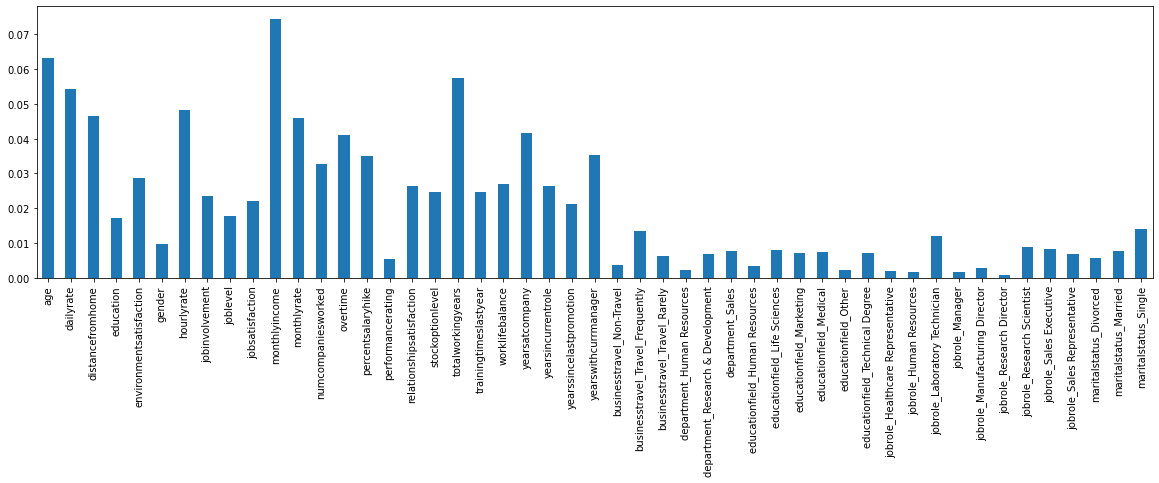

In [31]:
feat_importance = pd.Series(classification_rf.feature_importances_, index= X.columns)
fig = plt.figure(figsize=(20, 5))
feat_importance.plot(kind="bar")

In [32]:
low_importance_features = feat_importance[feat_importance < 0.02].index.tolist()
low_importance_features

['education',
 'gender',
 'joblevel',
 'performancerating',
 'businesstravel_Non-Travel',
 'businesstravel_Travel_Frequently',
 'businesstravel_Travel_Rarely',
 'department_Human Resources',
 'department_Research & Development',
 'department_Sales',
 'educationfield_Human Resources',
 'educationfield_Life Sciences',
 'educationfield_Marketing',
 'educationfield_Medical',
 'educationfield_Other',
 'educationfield_Technical Degree',
 'jobrole_Healthcare Representative',
 'jobrole_Human Resources',
 'jobrole_Laboratory Technician',
 'jobrole_Manager',
 'jobrole_Manufacturing Director',
 'jobrole_Research Director',
 'jobrole_Research Scientist',
 'jobrole_Sales Executive',
 'jobrole_Sales Representative',
 'maritalstatus_Divorced',
 'maritalstatus_Married',
 'maritalstatus_Single']

### Feature selection and data preparation to run the ML model again

Taking into account the importance of the features as we just saw, we will proceed to remove the columns that have the least influence or affect less the prediction in order to reduce the number of fields that the user will have to fill in on the web app as we already mentioned. 

In [33]:
# Importing the data again pre-dummified / pre-encoded

transf_data = pd.read_csv('data/transformed_data.csv')
pd.set_option("display.max_columns", None)
transf_data

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [34]:
# Removing less important columns and dummifying / encoding again the categorical data
# We do not need to encode again 'businesstravel', 'department', 'educationfield', 'jobrole', and 'maritalstatus' colummns as they are within the ones we will drop

transf_data.drop([
 'education',
 'gender',
 'joblevel',
 'performancerating',
 'businesstravel',
 'department',
 'educationfield',
 'jobrole',
 'maritalstatus',], axis=1, inplace=True)

transf_data['attrition'] = transf_data['attrition'].map({'Yes': 1, 'No': 0})
transf_data['overtime'] = transf_data['overtime'].map({'No': 1, 'Yes': 0})

transf_data.head()

,age,attrition,dailyrate,distancefromhome,environmentsatisfaction,hourlyrate,jobinvolvement,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,1102,1,2,94,3,4,5993,19479,8,0,11,1,0,8,0,1,6,4,0,5
1,49,0,279,8,3,61,2,2,5130,24907,1,1,23,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,4,92,2,3,2090,2396,6,0,15,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,56,3,3,2909,23159,1,0,11,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,40,3,2,3468,16632,9,1,12,4,1,6,3,3,2,2,2,2


In [35]:
# Scaling & splitting

X = transf_data.drop(['attrition'], axis=1)
y = transf_data['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Saving the scaler to a pickle file

import pickle

with open("pickle_files/standard_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [37]:
# Applying SMOTE (oversamplng technique)

smt = SMOTE(random_state=42)
X_train_balanced_sm, y_train_balanced_sm = smt.fit_resample(X_train_scaled, y_train)
y_train_balanced_sm.value_counts()

0    986
1    986
Name: attrition, dtype: int64

In [38]:
# Logistic regression model with hyperparameter tuning using the SMOTE resampled data

from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(random_state=42)


param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced_sm, y_train_balanced_sm)

print("Best parameters found:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

best_logistic = grid_search.best_estimator_
best_logistic.fit(X_train_balanced_sm, y_train_balanced_sm)

best_predictions = best_logistic.predict(X_test_scaled)
print(classification_report(y_test, best_predictions))

Best parameters found: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best accuracy score: 0.7708115401914798
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       247
           1       0.35      0.72      0.47        47

    accuracy                           0.74       294
   macro avg       0.64      0.73      0.65       294
weighted avg       0.84      0.74      0.77       294



C:\Users\allab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\allab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\allab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\allab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

When running the ML model after feature selection in attention to the importance of the features, we can see that given the purpose of our project, it seems that **the trade-off between the overall accuracy and the improved recall for the minority class (class 1) is acceptable**. In this specific case, focusing on the recall for the minority class (employees who leave the company) is more important, as it helps in identifying those employees more accurately.

In [39]:
# Saving the selected model to a pickle file

with open("pickle_files/best_logistic.pkl", "wb") as f:
    pickle.dump(best_logistic, f)

### Saving / Exporting the tranformed data again for future purposes

In [40]:
transf_data.to_csv("data/transformed_data_final.csv", index=False)